In [1]:
import rdflib
from rdflib import URIRef
from rdflib.graph import ConjunctiveGraph
g = ConjunctiveGraph()

In [2]:
import pandas as pd
import json
from SPARQLWrapper import SPARQLWrapper, XML, JSON
from rdflib import Graph

In [3]:
def get_sparql_dataframe(service, query):
    #Helper function to convert SPARQL results into a pandas data frame
    sparql = SPARQLWrapper(service)
    sparql.setQuery(query)
    sparql.setReturnFormat(JSON)
    result = sparql.query()
    
    processed_results = json.load(result.response)
    cols = processed_results['head']['vars']
    
    out =[]
    for row in processed_results['results']['bindings']:
        item =[]
        for c in cols:
            item.append(row.get(c, {}).get('value'))
        out.append(item)
    return pd.DataFrame(out, columns=cols)

In [4]:
wds = "http://dbpedia.org/sparql"

In [5]:
rq =""" 

PREFIX cat: <http://dbpedia.org/resource/Category:> 
SELECT ?broaderConcept ?preferredLabel WHERE {
  cat:Jewellery_retailers_of_the_United_Kingdom skos:broader ?broaderConcept .
  ?broaderConcept skos:prefLabel ?preferredLabel . 

}
"""

In [6]:
rq =""" 

PREFIX cat: <http://dbpedia.org/resource/Category:> 
CONSTRUCT {
  cat:Computer_hardware_companies skos:broader ?broaderConcept .
  ?broaderConcept skos:prefLabel ?preferredLabel . 
  ?broader rdf:type skos:Concept .
}
WHERE {
  cat:Computer_hardware_companies skos:broader ?broaderConcept .
  ?broaderConcept skos:prefLabel ?preferredLabel . 
}


"""

In [7]:
df = get_sparql_dataframe(wds,rq)

C:\ProgramData\Anaconda3\lib\site-packages\SPARQLWrapper\Wrapper.py:801: RuntimeWarning: Sending Accept header '*/*' because unexpected returned format 'json' in a 'CONSTRUCT' SPARQL query form
  warnings.warn("Sending Accept header '*/*' because unexpected returned format '%s' in a '%s' SPARQL query form" % (self.returnFormat, self.queryType), RuntimeWarning)


In [8]:
df

,s,p,o
0,http://dbpedia.org/resource/Category:Computer_...,http://www.w3.org/2004/02/skos/core#prefLabel,Computer hardware
1,http://dbpedia.org/resource/Category:Computer_...,http://www.w3.org/2004/02/skos/core#broader,http://dbpedia.org/resource/Category:Computer_...
2,http://dbpedia.org/resource/Category:Computer_...,http://www.w3.org/2004/02/skos/core#broader,http://dbpedia.org/resource/Category:Computer_...
3,http://dbpedia.org/resource/Category:Computer_...,http://www.w3.org/2004/02/skos/core#broader,http://dbpedia.org/resource/Category:Electroni...
4,http://dbpedia.org/resource/Category:Computers,http://www.w3.org/2004/02/skos/core#prefLabel,Computers
5,http://dbpedia.org/resource/Category:Computer_...,http://www.w3.org/2004/02/skos/core#prefLabel,Computer companies
6,http://dbpedia.org/resource/Category:Computer_...,http://www.w3.org/2004/02/skos/core#broader,http://dbpedia.org/resource/Category:Computers
7,http://dbpedia.org/resource/Category:Electroni...,http://www.w3.org/2004/02/skos/core#prefLabel,Electronics companies


In [9]:
Food_retailers_of_the_United_Kingdom
Jewellery_retailers_of_the_United_Kingdom

NameError: name 'Food_retailers_of_the_United_Kingdom' is not defined

In [10]:
rq =""" 
PREFIX dbpediaO: <http://dbpedia.org/ontology/>
PREFIX cat: <http://dbpedia.org/resource/Category:> 
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>

SELECT ?store ?keyPerson ?subsidiary ?products ?foundedBy WHERE {

?store skos:broader cat:Retail_companies_of_the_United_Kingdom. 
?store dbo:industry dbr:Retail.
?store dbo:keyPerson ?keyPerson.
?store dbo:subsidiary ?subsidiary.
?store dbo:foundedBy ?foundedBy.
?store dbp:products ?products

}
"""

# Code that can used

In [11]:
rq =""" 
PREFIX dbpediaO: <http://dbpedia.org/ontology/>
PREFIX cat: <http://dbpedia.org/resource/Category:> 
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>


SELECT DISTINCT ?store  WHERE {

?store dct:subject cat:Retail_companies_of_the_United_Kingdom. 
?store dct:subject ?subject.

}
"""

In [12]:
df = get_sparql_dataframe(wds,rq)

In [13]:
df.head(100)

,store
0,http://dbpedia.org/resource/Currys
1,http://dbpedia.org/resource/Birthdays_(retailer)
2,http://dbpedia.org/resource/Kaleidoscope_(reta...
3,http://dbpedia.org/resource/New_Look_(company)
4,http://dbpedia.org/resource/Numark_(pharmacy)
5,http://dbpedia.org/resource/Office_Holdings
6,http://dbpedia.org/resource/Premier_Stores
7,http://dbpedia.org/resource/Storehouse_plc
8,http://dbpedia.org/resource/99p_Stores
9,http://dbpedia.org/resource/BrightHouse_(retai...


In [14]:
rq =""" 
PREFIX dbpediaO: <http://dbpedia.org/ontology/>
PREFIX cat: <http://dbpedia.org/resource/Category:> 
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>


SELECT ?store ?keyPerson ?subsidiary ?products ?foundedBy WHERE {

?store dct:subject cat:Retail_companies_of_the_United_Kingdom. 
?store dct:subject ?subject.
?store dbo:keyPerson ?keyPerson.
?store dbo:subsidiary ?subsidiary.
?store dbo:foundedBy ?foundedBy.
?store dbp:products ?products
}
"""

In [15]:
df = get_sparql_dataframe(wds,rq)

In [16]:
df.head(100)

,store,keyPerson,subsidiary,products,foundedBy
0,http://dbpedia.org/resource/John_Lewis_Partner...,http://dbpedia.org/resource/Andy_Street,http://dbpedia.org/resource/Waitrose,"Clothing, watches & jewellery, giftwares, cosm...",http://dbpedia.org/resource/John_Spedan_Lewis
1,http://dbpedia.org/resource/John_Lewis_Partner...,http://dbpedia.org/resource/Andy_Street,http://dbpedia.org/resource/Waitrose,"Clothing, watches & jewellery, giftwares, cosm...",http://dbpedia.org/resource/John_Spedan_Lewis
2,http://dbpedia.org/resource/John_Lewis_Partner...,http://dbpedia.org/resource/Andy_Street,http://dbpedia.org/resource/Waitrose,"Clothing, watches & jewellery, giftwares, cosm...",http://dbpedia.org/resource/John_Spedan_Lewis
3,http://dbpedia.org/resource/John_Lewis_Partner...,http://dbpedia.org/resource/Andy_Street,http://dbpedia.org/resource/Waitrose,"Clothing, watches & jewellery, giftwares, cosm...",http://dbpedia.org/resource/John_Spedan_Lewis
4,http://dbpedia.org/resource/John_Lewis_Partner...,http://dbpedia.org/resource/Andy_Street,http://dbpedia.org/resource/Waitrose,"Clothing, watches & jewellery, giftwares, cosm...",http://dbpedia.org/resource/John_Spedan_Lewis
5,http://dbpedia.org/resource/John_Lewis_Partner...,http://dbpedia.org/resource/Rob_Collins_(busin...,http://dbpedia.org/resource/Waitrose,"Clothing, watches & jewellery, giftwares, cosm...",http://dbpedia.org/resource/John_Spedan_Lewis
6,http://dbpedia.org/resource/John_Lewis_Partner...,http://dbpedia.org/resource/Rob_Collins_(busin...,http://dbpedia.org/resource/Waitrose,"Clothing, watches & jewellery, giftwares, cosm...",http://dbpedia.org/resource/John_Spedan_Lewis
7,http://dbpedia.org/resource/John_Lewis_Partner...,http://dbpedia.org/resource/Rob_Collins_(busin...,http://dbpedia.org/resource/Waitrose,"Clothing, watches & jewellery, giftwares, cosm...",http://dbpedia.org/resource/John_Spedan_Lewis
8,http://dbpedia.org/resource/John_Lewis_Partner...,http://dbpedia.org/resource/Rob_Collins_(busin...,http://dbpedia.org/resource/Waitrose,"Clothing, watches & jewellery, giftwares, cosm...",http://dbpedia.org/resource/John_Spedan_Lewis
9,http://dbpedia.org/resource/John_Lewis_Partner...,http://dbpedia.org/resource/Rob_Collins_(busin...,http://dbpedia.org/resource/Waitrose,"Clothing, watches & jewellery, giftwares, cosm...",http://dbpedia.org/resource/John_Spedan_Lewis


In [17]:
df.to_csv("ck_test3.csv")

In [18]:
df.to_csv("ck_test2.csv")

# test code

In [19]:
rq =""" 
PREFIX dbpediaO: <http://dbpedia.org/ontology/>

SELECT ?store ?location ?products  WHERE {
?store a dbpediaO:Company.
?store dbo:industry dbr:Clothing.
?store dbo:location ?location.
?store dbp:products ?products

}
"""

In [20]:
df = get_sparql_dataframe(wds,rq)

In [21]:
df.head(100)

,store,location,products
0,http://dbpedia.org/resource/Goody's_(store),"http://dbpedia.org/resource/Houston,_Texas","Apparel, accessories, cosmetics, footwear, and..."
1,http://dbpedia.org/resource/Goody's_(store),http://dbpedia.org/resource/Texas,"Apparel, accessories, cosmetics, footwear, and..."
2,http://dbpedia.org/resource/The_Limited,http://dbpedia.org/resource/United_States,"Shirts/tops, pants, denim, jackets, sweaters, ..."
3,http://dbpedia.org/resource/The_Limited,"http://dbpedia.org/resource/Columbus,_Ohio","Shirts/tops, pants, denim, jackets, sweaters, ..."
4,http://dbpedia.org/resource/The_Limited,http://dbpedia.org/resource/Ohio,"Shirts/tops, pants, denim, jackets, sweaters, ..."
5,http://dbpedia.org/resource/Topman,http://dbpedia.org/resource/London,Men's fashion
6,http://dbpedia.org/resource/Topman,http://dbpedia.org/resource/United_Kingdom,Men's fashion
7,http://dbpedia.org/resource/Dorothy_Perkins,http://dbpedia.org/resource/London,Women's retail fashion
8,http://dbpedia.org/resource/Dorothy_Perkins,http://dbpedia.org/resource/United_Kingdom,Women's retail fashion


In [22]:
rq =""" 
PREFIX dbpediaO: <http://dbpedia.org/ontology/>

SELECT ?store  ?products  WHERE {
?store a dbpediaO:Company.
?store dbo:industry dbr:Clothing.
?store dbo:location dbr:London.
?store dbp:products ?products

}
"""

In [23]:
df = get_sparql_dataframe(wds,rq)

In [24]:
df.head(100)

,store,products
0,http://dbpedia.org/resource/Topman,Men's fashion
1,http://dbpedia.org/resource/Dorothy_Perkins,Women's retail fashion


In [25]:
rq =""" 
PREFIX  dbpedia-owl:  <http://dbpedia.org/ontology/>
PREFIX dbpedia: <http://dbpedia.org/resource>
PREFIX dbpprop: <http://dbpedia.org/property>
SELECT DISTINCT ?citylabel ?countrylabel ?pop
WHERE {
   ?city rdf:type dbpedia-owl:City.
   ?city rdfs:label ?citylabel.
   ?city dbpedia-owl:country ?country.
   ?country rdfs:label ?countrylabel.
   ?city dbpedia-owl:populationTotal ?pop .
   FILTER ( lang(?countrylabel) = 'en' and lang(?citylabel) = 'en' and ?pop>10000)
}
"""

In [26]:
df = get_sparql_dataframe(wds,rq)

In [27]:
df.head(4)

,citylabel,countrylabel,pop
0,"Nandgaon, Maharashtra",India,23191
1,"Raman, Punjab (India)",India,50549
2,Siguatepeque,Honduras,75000
3,Al-Rastan,Syria,39834


In [28]:
rq =""" 
PREFIX  dbpedia-owl:  <http://dbpedia.org/ontology/>
PREFIX dbpedia: <http://dbpedia.org/resource>
PREFIX dbpprop: <http://dbpedia.org/property>
SELECT DISTINCT ?citylabel ?countrylabel 
WHERE {
   ?city rdf:type dbpedia-owl:City.
   ?city rdfs:label ?citylabel.
   ?city dbpedia-owl:country ?country.
   ?country rdfs:label ?countrylabel.

   FILTER ( lang(?countrylabel) = 'en' and lang(?citylabel) = 'en' )
}
"""

In [29]:
df = get_sparql_dataframe(wds,rq)

In [30]:
df.head(4)

,citylabel,countrylabel
0,Al-Rastan,Syria
1,"Paige, Texas",United States
2,"Cartersville, Georgia",United States
3,Downtown Visalia,United States


In [31]:
rq =""" 
PREFIX  dbpedia-owl:  <http://dbpedia.org/ontology/>
PREFIX dbpedia: <http://dbpedia.org/resource>
PREFIX dbpprop: <http://dbpedia.org/property>
SELECT DISTINCT ?companylabel ?countrylabel 
WHERE {
   ?company rdf:type dbpedia-owl:Company.
   ?company rdfs:label ?companylabel.
   ?company dbpedia-owl:country ?country.
   ?country rdfs:label ?countrylabel.

   FILTER ( lang(?countrylabel) = 'en' and lang(?companylabel) = 'en' )
}
"""

In [32]:
df = get_sparql_dataframe(wds,rq)

In [33]:
df.head(5)

,companylabel,countrylabel
0,Biblica,United States
1,Elway Research,United States
2,Rising Tide Records,United States
3,Rising Tide Studios,United States
4,Satellite News Channel,United States


# ck recommends these refined codes below to be used

In [34]:
rq =""" 
PREFIX  dbpedia-owl:  <http://dbpedia.org/ontology/>
PREFIX dbpedia: <http://dbpedia.org/resource>
PREFIX dbpprop: <http://dbpedia.org/property>
PREFIX cat: <http://dbpedia.org/resource/Category:>

SELECT DISTINCT ?company_name 
WHERE {
   ?company dct:subject cat:Retail_companies_of_the_United_Kingdom.
   ?company dct:subject ?subject.
   ?company rdfs:label ?company_name.
   
}
"""

In [35]:
df = get_sparql_dataframe(wds,rq)

In [36]:
df

,company_name
0,Currys
1,Currys
2,Birthdays (retailer)
3,Kaleidoscope (retailer)
4,New Look (Unternehmen)
5,New Look (company)
6,Numark (pharmacy)
7,Office Holdings
8,Premier Stores
9,Storehouse plc


In [37]:

rq =""" 
PREFIX  dbpedia-owl:  <http://dbpedia.org/ontology/>
PREFIX dbpedia: <http://dbpedia.org/resource>
PREFIX dbpprop: <http://dbpedia.org/property>
PREFIX cat: <http://dbpedia.org/resource/Category:>

SELECT DISTINCT ?company_name ?founded_By
WHERE {
   ?company dct:subject cat:Retail_companies_of_the_United_Kingdom.
   ?company dct:subject ?subject.
   ?company rdfs:label ?company_name.
   ?company dbo:foundedBy ?foundedBy.
   ?foundedBy rdfs:label ?founded_By.
   
   FILTER ( lang(?company_name) = 'en' and lang(?founded_By) = 'en' )
}
"""

In [38]:
df = get_sparql_dataframe(wds,rq)

In [39]:
df

,company_name,founded_By
0,New Look (company),Tom Singh
1,Vie at Home,Virgin Group
2,Home Bargains,Tom Morris (businessman)
3,Boots UK,John Boot
4,Next plc,Joseph Hepworth (tailor)
5,Selfridges,Harry Gordon Selfridge
6,The Original Factory Shop,Li & Fung
7,Greggs,John Gregg (baker)
8,Tesco,Jack Cohen (businessman)
9,Argos (retailer),Richard Tompkins


In [40]:

rq =""" 
PREFIX  dbpedia-owl:  <http://dbpedia.org/ontology/>
PREFIX dbpedia: <http://dbpedia.org/resource>
PREFIX dbpprop: <http://dbpedia.org/property>
PREFIX cat: <http://dbpedia.org/resource/Category:>

SELECT  DISTINCT ?company_name ?founded_By ?product ?subsidiary_ck
WHERE {
   ?company dct:subject cat:Retail_companies_of_the_United_Kingdom.
   ?company dct:subject ?subject.
   ?company rdfs:label ?company_name.
   ?company dbo:foundedBy ?foundedBy.
   ?company dbo:product ?dboproduct.
   ?dboproduct rdfs:label ?product.
   ?foundedBy rdfs:label ?founded_By.
   OPTIONAL {?company dbo:subsidiary ?subsidiary.}
   OPTIONAL {?subsidiary rdfs:label ?subsidiary_ck.}
   
   FILTER ( lang(?company_name) = 'en' and lang(?founded_By) = 'en' and lang(?subsidiary_ck) = 'en' )
}
"""

In [41]:
rq =""" 
PREFIX  dbpedia-owl:  <http://dbpedia.org/ontology/>
PREFIX dbpedia: <http://dbpedia.org/resource>
PREFIX dbpprop: <http://dbpedia.org/property>
PREFIX cat: <http://dbpedia.org/resource/Category:>
PREFIX dbp: <http://dbpedia.org/property/owner>

SELECT  DISTINCT ?company_name ?Key_Person ?product ?type_ck
WHERE {
   ?company dct:subject cat:Retail_companies_of_the_United_Kingdom.
   ?company dct:subject ?subject.
   ?company rdfs:label ?company_name.
   ?company dbo:keyPerson ?keyPerson.
   ?keyPerson rdfs:label ?Key_Person.
   ?company dbo:product ?dboproduct.
   ?dboproduct rdfs:label ?product.
   ?company dbo:type ?type.
   ?type rdfs:label ?type_ck.
   FILTER ( lang(?company_name) = 'en' and lang(?Key_Person) = 'en' and lang(?product) = 'en' and lang(?type_ck) = 'en')
}

GROUP BY ?company
"""

In [42]:
df = get_sparql_dataframe(wds,rq)

In [43]:
df

,company_name,Key_Person,product,type_ck
0,Tesco,Dave Lewis (businessman),Big-box store,Public limited company
1,JD Sports,Chairman,Sportswear (activewear),Public limited company
2,Morrisons,Ken Morrison,Supermarket,Public limited company
3,Carphone Warehouse,Charles Dunstone,Service (economics),Private limited company
4,Carphone Warehouse,Chief Executive,Landline phone,Private limited company
5,Matalan,John Hargreaves (businessman),Clothing,Privately held company
6,Topshop,Ian Grabiner,Shoe,Private company limited by shares
7,Topshop,Chief executive officer,Clothing,Private company limited by shares
8,Tesco International operations,Richard Broadbent,Supermarket,Public limited company
9,Tesco International operations,Dave Lewis (Tesco),Cash and carry (wholesale),Public limited company


In [ ]:
?store dct:subject ?subject.
?store dbo:keyPerson ?keyPerson.
?store dbo:subsidiary ?subsidiary.
?store dbo:foundedBy ?foundedBy.
?store dbp:products ?products

In [44]:
rq =""" 
PREFIX  dbpedia-owl:  <http://dbpedia.org/ontology/>
PREFIX dbpedia: <http://dbpedia.org/resource>
PREFIX dbpprop: <http://dbpedia.org/property>
PREFIX cat: <http://dbpedia.org/resource/Category:>

SELECT  DISTINCT ?company_name ?founded_By ?subsidiary_ck
WHERE {
   ?company dct:subject cat:Retail_companies_of_the_United_Kingdom.
   ?company dct:subject ?subject.
   ?company rdfs:label ?company_name.
   OPTIONAL { ?company dbo:foundedBy ?foundedBy }
   OPTIONAL { ?foundedBy rdfs:label ?founded_By }
   OPTIONAL { ?company dbo:subsidiary ?subsidiary }
   OPTIONAL { ?subsidiary rdfs:label ?subsidiary_ck }
   
   
   FILTER ( lang(?company_name) = 'en' and lang(?founded_By) = 'en' and lang(?subsidiary_ck) = 'en')
}
"""

In [45]:
df = get_sparql_dataframe(wds,rq)

In [46]:
df

,company_name,founded_By,subsidiary_ck
0,Currys,the previous municipality from which this one ...,the previous municipality from which this one ...
1,Currys,Has KML data associated with it (usually becau...,the previous municipality from which this one ...
2,Currys,String designation of the WrittenWork describi...,the previous municipality from which this one ...
3,Currys,percentage of a place's population that is lit...,the previous municipality from which this one ...
4,Currys,Link from a Wikipage to a Wikipage in a differ...,the previous municipality from which this one ...
5,Currys,ancient area of jurisdiction of a person (feud...,the previous municipality from which this one ...
6,Currys,A Person's role in an event,the previous municipality from which this one ...
7,Currys,ACT score,the previous municipality from which this one ...
8,Currys,AFI Award,the previous municipality from which this one ...
9,Currys,ATC prefix,the previous municipality from which this one ...


In [47]:

rq =""" 
PREFIX  dbpedia-owl:  <http://dbpedia.org/ontology/>
PREFIX dbpedia: <http://dbpedia.org/resource>
PREFIX dbpprop: <http://dbpedia.org/property>
PREFIX cat: <http://dbpedia.org/resource/Category:>

SELECT  DISTINCT ?company_name ?type_ck ?subsidiary_ck
WHERE {
   ?company dct:subject cat:Retail_companies_of_the_United_Kingdom.
   ?company dct:subject ?subject.
   ?company rdfs:label ?company_name.
   ?company dbo:type ?type.
   ?type rdfs:label ?type_ck.
   ?company dbo:subsidiary ?subsidiary.
   ?subsidiary rdfs:label ?subsidiary_ck.
   
   
   FILTER ( lang(?company_name) = 'en' and lang(?type_ck) = 'en' and lang(?subsidiary_ck) = 'en' )
}
"""

In [48]:
df = get_sparql_dataframe(wds,rq)

In [49]:
df

,company_name,type_ck,subsidiary_ck
0,Asda,Subsidiary,Asda Mobile
1,Boots UK,Private company limited by shares,Boots Opticians
2,Tesco,Public limited company,Giraffe Restaurants
3,Tesco,Public limited company,Dunnhumby
4,Tesco,Public limited company,Tesco Ireland
5,Tesco,Public limited company,Tesco Bank
6,Tesco,Public limited company,Tesco Mobile
7,Tesco,Public limited company,Tesco Kipa
8,Game (retailer),Public company,Multiplay
9,John Lewis Partnership,Partnership,Waitrose


In [229]:
from rdflib import Graph
from SPARQLWrapper import SPARQLWrapper, RDF

# create empty graph
g = Graph() 

# execute SPARQL CONSTRUCT query to get a set of RDF triples
sparql = SPARQLWrapper("http://dbpedia.org/sparql")
sparql.addDefaultGraph("http://dbpedia.org")
query = """

PREFIX skos: <http://www.w3.org/2004/02/skos/core#>
PREFIX cat: <http://dbpedia.org/resource/Category:> 
CONSTRUCT {

  ?child rdf:type skos:Concept .
  ?childConcept skos:broader cat:Horror_films .
  ?childConcept skos:prefLabel ?childLabel . 

  ?grandchildConcept rdf:type skos:Concept .
  ?grandchildConcept skos:broader ?childConcept . 
  ?grandchildConcept skos:prefLabel ?grandchildLabel . 

  ?greatgrandchildConcept rdf:type skos:Concept .
  ?greatgrandchildConcept skos:broader ?grandchildConcept . 
  ?greatgrandchildConcept skos:prefLabel ?greatgrandchildLabel . 

  <http://www.dataversity.net/taxonomy/films> rdf:type skos:ConceptScheme .
  <http://www.dataversity.net/taxonomy/films> skos:hasTopConcept cat:Horror_films .
  cat:Horror_films skos:prefLabel "Horror films" . 
}
WHERE {
  {
    ?childConcept skos:broader cat:Horror_films .
    ?childConcept skos:prefLabel ?childLabel . 
  }
  UNION
  {
    ?childConcept skos:broader cat:Horror_films .
    ?grandchildConcept skos:broader ?childConcept . 
    ?grandchildConcept skos:prefLabel ?grandchildLabel . 
  }
  UNION
  {
    ?childConcept skos:broader cat:Horror_films .
    ?grandchildConcept skos:broader ?childConcept . 
    ?greatgrandchildConcept skos:broader ?grandchildConcept . 
    ?greatgrandchildConcept skos:prefLabel ?greatgrandchildLabel . 
  }
}
"""
sparql.setQuery(query)
try : 
    sparql.setReturnFormat(RDF)
    results = sparql.query()
    triples = results.convert() # this converts directly to an RDFlib Graph object
except: 
    print ("query failed")


# add triples to graph
g += triples


C:\ProgramData\Anaconda3\lib\site-packages\SPARQLWrapper\Wrapper.py:801: RuntimeWarning: Sending Accept header '*/*' because unexpected returned format 'rdf' in a 'CONSTRUCT' SPARQL query form
  warnings.warn("Sending Accept header '*/*' because unexpected returned format '%s' in a '%s' SPARQL query form" % (self.returnFormat, self.queryType), RuntimeWarning)


In [230]:
from rdflib.extras.external_graph_libs import rdflib_to_networkx_multidigraph
import networkx as nx
import matplotlib.pyplot as plt

G = rdflib_to_networkx_multidigraph(g)
#plot networkx instance of rdf graph
pos = nx.spring_layout(G, scale=2)
edge_labels = nx.get_edge_attributes(G, 'r')
nx.draw_networkx_edge_labels(G, pos, labels=edge_labels)
#nx.draw(G, with_labels=True)

{(rdflib.term.URIRef('http://dbpedia.org/resource/Category:Insidious_(film_series)'),
  rdflib.term.Literal('Insidious (film series)', lang='en')): Text(-0.979751,-0.690325,'{}'),
 (rdflib.term.URIRef('http://dbpedia.org/resource/Category:Insidious_(film_series)'),
  rdflib.term.URIRef('http://dbpedia.org/resource/Category:Horror_films_by_series')): Text(-0.0824483,0.0231134,'{}'),
 (rdflib.term.URIRef('http://dbpedia.org/resource/Category:Insidious_(film_series)'),
  rdflib.term.URIRef('http://www.w3.org/2004/02/skos/core#Concept')): Text(0.314186,-0.983556,'{}'),
 (rdflib.term.URIRef('http://dbpedia.org/resource/Category:Insidious_(film_series)'),
  rdflib.term.URIRef('http://dbpedia.org/resource/Category:Supernatural_horror_films')): Text(-0.138675,-0.910799,'{}'),
 (rdflib.term.URIRef('http://dbpedia.org/resource/Category:Tremors_(franchise)'),
  rdflib.term.URIRef('http://dbpedia.org/resource/Category:Monster_movies')): Text(0.0866113,-0.921943,'{}'),
 (rdflib.term.URIRef('http://

In [231]:
import networkx as nx

from bokeh.io import show, output_file
from bokeh.models import Plot, Range1d, MultiLine, Circle, HoverTool, BoxZoomTool, ResetTool
from bokeh.models.graphs import from_networkx
from bokeh.palettes import Spectral4

# Prepare Data
#G = nx.karate_club_graph()

# Show with Bokeh
plot = Plot(plot_width=900, plot_height=900, x_range=Range1d(-1.1, 1.1), y_range=Range1d(-1.1, 1.1))
plot.title.text = "Knowledge Graph of Horror"

node_hover_tool = HoverTool(tooltips=[("store", "@index")])
plot.add_tools(node_hover_tool, BoxZoomTool(), ResetTool())

graph_renderer = from_networkx(G, nx.kamada_kawai_layout, scale=1, center=(0, 0))

graph_renderer.node_renderer.glyph = Circle(size=15, fill_color="grey")
graph_renderer.edge_renderer.glyph = MultiLine(line_color="green", line_alpha=0.8, line_width=1)
plot.renderers.append(graph_renderer)

output_file("interactive_graphsckk.html")
show(plot)

In [6]:
from rdflib import Graph
from SPARQLWrapper import SPARQLWrapper, RDF

# create empty graph
g = Graph() 

# execute SPARQL CONSTRUCT query to get a set of RDF triples
sparql = SPARQLWrapper("http://dbpedia.org/sparql")
sparql.addDefaultGraph("http://dbpedia.org")
query = """
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>
PREFIX cat: <http://dbpedia.org/resource/Category:> 
CONSTRUCT {

  ?child rdf:type skos:Concept .
  ?childConcept skos:broader cat:Retail_companies_of_the_United_Kingdom .
  ?childConcept skos:prefLabel ?childLabel . 

  ?grandchildConcept rdf:type skos:Concept .
  ?grandchildConcept skos:broader ?childConcept . 
  ?grandchildConcept skos:prefLabel ?grandchildLabel . 

  ?greatgrandchildConcept rdf:type skos:Concept .
  ?greatgrandchildConcept skos:broader ?grandchildConcept . 
  ?greatgrandchildConcept skos:prefLabel ?greatgrandchildLabel .
}
WHERE {
  {
    ?childConcept skos:broader cat:Retail_companies_of_the_United_Kingdom .
    ?childConcept skos:prefLabel ?childLabel . 
  }
  UNION
  {
    ?childConcept skos:broader cat:Retail_companies_of_the_United_Kingdom .
    ?grandchildConcept skos:broader ?childConcept . 
    ?grandchildConcept skos:prefLabel ?grandchildLabel . 
  }
  UNION
  {
    ?childConcept skos:broader cat:Retail_companies_of_the_United_Kingdom .
    ?grandchildConcept skos:broader ?childConcept . 
    ?greatgrandchildConcept skos:broader ?grandchildConcept . 
    ?greatgrandchildConcept skos:prefLabel ?greatgrandchildLabel . 
  }
}
"""
sparql.setQuery(query)
try : 
    sparql.setReturnFormat(RDF)
    results = sparql.query()
    triples = results.convert() # this converts directly to an RDFlib Graph object
except: 
    print ("query failed")


# add triples to graph
g += triples



C:\ProgramData\Anaconda3\lib\site-packages\SPARQLWrapper\Wrapper.py:801: RuntimeWarning: Sending Accept header '*/*' because unexpected returned format 'rdf' in a 'CONSTRUCT' SPARQL query form
  warnings.warn("Sending Accept header '*/*' because unexpected returned format '%s' in a '%s' SPARQL query form" % (self.returnFormat, self.queryType), RuntimeWarning)


{(rdflib.term.URIRef('http://dbpedia.org/resource/Category:Auto_dealerships_of_the_United_Kingdom'),
  rdflib.term.URIRef('http://dbpedia.org/resource/Category:Retail_companies_of_the_United_Kingdom')): Text(0.895731,-0.142783,'{}'),
 (rdflib.term.URIRef('http://dbpedia.org/resource/Category:Auto_dealerships_of_the_United_Kingdom'),
  rdflib.term.Literal('Auto dealerships of the United Kingdom', lang='en')): Text(-0.796553,-0.757149,'{}'),
 (rdflib.term.URIRef('http://dbpedia.org/resource/Category:Bakeries_of_the_United_Kingdom'),
  rdflib.term.URIRef('http://dbpedia.org/resource/Category:Retail_companies_of_the_United_Kingdom')): Text(1.54196,-0.30763,'{}'),
 (rdflib.term.URIRef('http://dbpedia.org/resource/Category:Bakeries_of_the_United_Kingdom'),
  rdflib.term.Literal('Bakeries of the United Kingdom', lang='en')): Text(1.14264,-1.25322,'{}'),
 (rdflib.term.URIRef('http://dbpedia.org/resource/Category:Bookshops_in_London'),
  rdflib.term.URIRef('http://dbpedia.org/resource/Category:

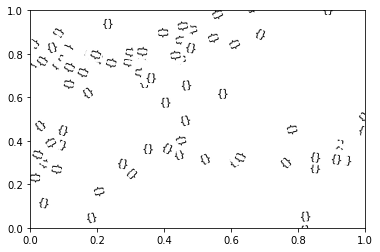

In [7]:
from rdflib.extras.external_graph_libs import rdflib_to_networkx_multidigraph
import networkx as nx
import matplotlib.pyplot as plt

G = rdflib_to_networkx_multidigraph(g)
#plot networkx instance of rdf graph
pos = nx.spring_layout(G, scale=2)
edge_labels = nx.get_edge_attributes(G, 'r')
nx.draw_networkx_edge_labels(G, pos, labels=edge_labels)
#nx.draw(G, with_labels=True)

In [18]:
import networkx as nx

from bokeh.io import show, output_file
from bokeh.models import Plot, Range1d, MultiLine, Circle, HoverTool, BoxZoomTool, ResetTool
from bokeh.models.graphs import from_networkx
from bokeh.palettes import Spectral4

# Prepare Data
#G = nx.karate_club_graph()

# Show with Bokeh
plot = Plot(plot_width=900, plot_height=900, x_range=Range1d(-1.1, 1.1), y_range=Range1d(-1.1, 1.1))
plot.title.text = "Knowledge Graph of UK Supermarket"

node_hover_tool = HoverTool(tooltips=[("store", "@index")])
plot.add_tools(node_hover_tool, BoxZoomTool(), ResetTool())

graph_renderer = from_networkx(G, nx.kamada_kawai_layout, scale=1, center=(0, 0))

graph_renderer.node_renderer.glyph = Circle(size=50, fill_color="grey")
graph_renderer.edge_renderer.glyph = MultiLine(line_color="green", line_alpha=0.8, line_width=1)
plot.renderers.append(graph_renderer)

output_file("interactive_graphs.html")
show(plot)

NameError: name 'G' is not defined